# Daub 5/3 integer-to-integer system

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Импорт пользовательских функций.

In [19]:
from Functions.user_functions import indx_even
from Functions.daub_5_3 import daub_5_3
from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.idaub_5_3_lift import idaub_5_3_lift
from Functions.daub_5_3_lift_2D import daub_5_3_lift_2D
from Functions.idaub_5_3_lift_2D import idaub_5_3_lift_2D

In [20]:
f = np.random.randint(low=-10, high=11, size=8)
N = len(f)
d = [0] * (N//2)
a = [0] * (N//2)

### Исследование коэффициентов ${d}$

In [21]:
# Функция вычисления коэффициентов флуктуации.
def d_func(k, f, N, int_flag):
    if int_flag:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) //2
    else:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) /2

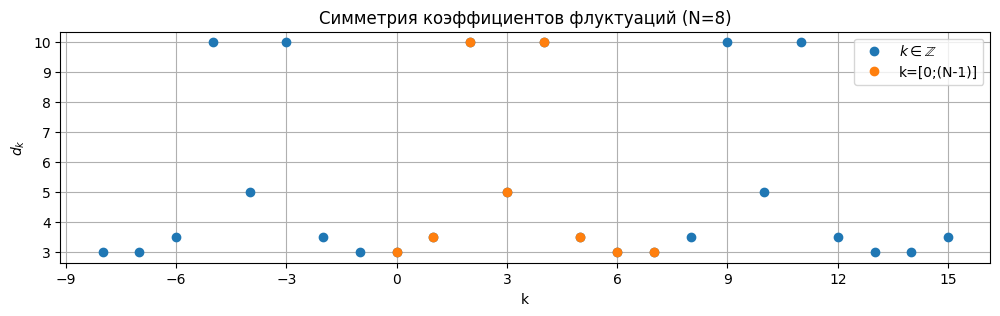

In [22]:
n_gr = []
d_gr = []
for k in range(-N,2*N):
    n_gr.append(k)
    d_gr.append(d_func(k, f, N, int_flag=False))
n_gr_N = []
d_gr_N = []

for k in range(N):
    n_gr_N.append(k)
    d_gr_N.append(d_func(k, f, N, int_flag=False))
    
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(12)
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(['$k \in \mathbb{Z}$','k=[0;(N-1)]'])
plt.title('Симметрия коэффициентов флуктуаций' + ' (N=' + str(N) + ')')
plt.xlabel('k')
plt.ylabel('$d_k$')
plt.grid(True)
plt.savefig('readme_img/d_symmetry.png', bbox_inches='tight')
plt.show()

Отсюда вывод: ${d_{-1} = d_0}$.

## Прямое преобразование

In [23]:
for k in range(N//2):
    d[k] = f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)])/2
    if k == 0:
        a[k] = f[indx_even(2*k,N)] + d[k] /2
    else:
        a[k] = f[indx_even(2*k,N)] + (d[k-1] + d[k]) /4
    #a[k] = -1/8*(f[indx_even(2*k-2,N)] + f[indx_even(2*k+2,N)]) + 1/4*(f[indx_even(2*k-1,N)] + f[indx_even(2*k+1,N)]) + 3/4*f[indx_even(2*k,N)]
print('a', a)
print('d', d)

a [-8.5, 3.625, 8.375, -1.25]
d [3.0, 3.5, 10.0, 5.0]


## Обратное преобразование

In [24]:
f_rec = [0] * N
# Odd values.
for k in range(N//2):
    if k == 0:
        f_rec[2*k] = a[k] - d[k] /2
    else:
        f_rec[2*k] = a[k] - (d[k-1] + d[k]) /4

# Even values.
for k in range(N//2):
    f_rec[2*k+1] = d[k] + (f[2*k] + f[indx_even(2*k+2,N)])/2
print('Reconstruction:', f_rec)
print('Original:', f)
print('Difference:', f-f_rec)

Reconstruction: [-10.0, -1.0, 2.0, 7.0, 5.0, 10.0, -5.0, 0.0]
Original: [-10  -1   2   7   5  10  -5   0]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Прямое и обратное преобразование при помощи матричных операций

In [25]:
Mdir = np.matrix(np.concatenate(daub_5_3(N), axis = 0))
tr = np.matrix(f)*(Mdir.T)
Mrev = np.linalg.inv(Mdir).T
print('Wavelet coefficients:', tr.tolist()[0])
print('Reconstruction:', (tr * Mrev).tolist()[0])
print('Original:', f)
print('Difference:', f-(tr * Mrev).tolist()[0])

Wavelet coefficients: [-8.5, 3.625, 8.375, -1.25, 3.0, 3.5, 10.0, 5.0]
Reconstruction: [-10.0, -1.0, 2.0, 7.0, 5.0, 10.0, -5.0, 0.0]
Original: [-10  -1   2   7   5  10  -5   0]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Целочисленные преобразования

Созданы функции lifting-преобразования.

In [26]:
# float-преобразование.
coeff_float = daub_5_3_lift(f, int_flag=False)
print(coeff_float)

# int-преобразование.
coeff_int = daub_5_3_lift(f, int_flag=True)
print(coeff_int)

[-8.5, 3.625, 8.375, -1.25, 3.0, 3.5, 10.0, 5.0]
[-8, 4, 8, -1, 3, 3, 10, 5]


Обратное преобразование, также по lifting-схеме.

In [28]:
# float-преобразование.
f_float = idaub_5_3_lift(coeff_float, int_flag=False)
print(np.array(f_float).dtype)
print(f_float)

# int-преобразование.
f_int = idaub_5_3_lift(coeff_int, int_flag=True)
print(np.array(f_int).dtype)
print(f_int)

print('Difference:', [a - b for a, b in zip(f_float, f_int)])

float64
[-10.0, -1.0, 2.0, 7.0, 5.0, 10.0, -5.0, 0.0]
int32
[-10, -1, 2, 7, 5, 10, -5, 0]
Difference: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 2D-преобразование

Формируем двумерный массив.

In [ ]:
g = np.random.randint(low=-10, high=11, size=10*8).reshape(10,8)
print(g)

[[  1  -8   6  -6  -8   3  -2   4]
 [ -8  -7  -5   9   6   1   6   6]
 [ -3   5   0  -8 -10  -6   8  -5]
 [ 10   9  -9   7  -7   8   6   0]
 [  0   1   8  -5  -7   1  -3   0]
 [  9  -2   6  10  -8  -4  -2   3]
 [ -3  -5   6  -2  -6   2   6  10]
 [ -9  -3  -2   1   0  -9   2   0]
 [  5   1  -1  -8  -8   9  -2   5]
 [ -4  -8   0  -3   2  -6  -5   7]]


### Прямое преобразование

In [ ]:
# float-преобразование.
coeff_2D_float = daub_5_3_lift_2D(g, int_flag=False)
print(coeff_2D_float.dtype)
print(coeff_2D_float)

float64
[[  3.5        4.875    -14.125     -3.25     -11.       -13.5
   13.         6.      ]
 [ -2.75       3.9375   -14.875     -2.1875     2.5      -14.75
   -6.75     -10.      ]
 [-10.75       4.25      -3.8125    -3.8125    -2.5      -18.5
    1.25       3.5     ]
 [ -4.5        1.125     -2.5        8.25      -3.        -8.5
    6.5        2.5     ]
 [ 11.875     -0.4375    -4.3125     5.3125     0.75      -2.5
   21.25       2.      ]
 [ -8.0625    -0.796875  -0.375      3.390625  -2.625      1.4375
   -3.4375    -1.      ]
 [ 10.875     -1.078125  -5.796875   5.125      8.5        6.6875
    7.125     -7.625   ]
 [  0.4375     7.71875   -6.578125   0.609375 -10.875      4.25
    2.9375     6.5     ]
 [ -5.90625   -0.703125  -3.703125   2.390625   1.9375    -0.75
   -3.0625    -0.875   ]
 [ -1.0625    -2.71875   -2.28125   -0.46875   -5.625     -5.25
    6.125     13.      ]]


In [ ]:
# int-преобразование.
coeff_2D_int = daub_5_3_lift_2D(g, int_flag=True)
print(coeff_2D_int.dtype)
print(coeff_2D_int)

int32
[[  3   5 -14  -3 -11 -13  13   6]
 [ -3   4 -15  -2   2 -15  -7 -10]
 [-10   4  -4  -5  -2 -19   1   3]
 [ -4   1  -3   8  -3  -9   6   2]
 [ 12  -1  -4   5   1  -3  21   2]
 [ -8  -1   0   4  -3   1  -3  -1]
 [ 11  -1  -6   5   8   7   7  -8]
 [  1   7  -7   1 -11   4   3   6]
 [ -6  -1  -4   2   2  -1  -3  -1]
 [ -1  -2  -2   0  -5  -5   6  13]]


### Обратное преобразование

In [ ]:
g_float = idaub_5_3_lift_2D(coeff_2D_float, int_flag=False)
print(g_float)
print('Difference (sum):', np.sum(g-g_float))

[[  1.  -8.   6.  -6.  -8.   3.  -2.   4.]
 [ -8.  -7.  -5.   9.   6.   1.   6.   6.]
 [ -3.   5.   0.  -8. -10.  -6.   8.  -5.]
 [ 10.   9.  -9.   7.  -7.   8.   6.   0.]
 [  0.   1.   8.  -5.  -7.   1.  -3.   0.]
 [  9.  -2.   6.  10.  -8.  -4.  -2.   3.]
 [ -3.  -5.   6.  -2.  -6.   2.   6.  10.]
 [ -9.  -3.  -2.   1.   0.  -9.   2.   0.]
 [  5.   1.  -1.  -8.  -8.   9.  -2.   5.]
 [ -4.  -8.   0.  -3.   2.  -6.  -5.   7.]]
Difference (sum): 0.0


In [ ]:
g_int = idaub_5_3_lift_2D(coeff_2D_int, int_flag=True)
print(g_int)
print('Difference (sum):', np.sum(g-g_int))

[[  1  -8   6  -6  -8   3  -2   4]
 [ -8  -7  -5   9   6   1   6   6]
 [ -3   5   0  -8 -10  -6   8  -5]
 [ 10   9  -9   7  -7   8   6   0]
 [  0   1   8  -5  -7   1  -3   0]
 [  9  -2   6  10  -8  -4  -2   3]
 [ -3  -5   6  -2  -6   2   6  10]
 [ -9  -3  -2   1   0  -9   2   0]
 [  5   1  -1  -8  -8   9  -2   5]
 [ -4  -8   0  -3   2  -6  -5   7]]
Difference (sum): 0


In [ ]:
for k in range(20):
    print(int(k/4+1/2), (k+2)//4)

0 0
0 0
1 1
1 1
1 1
1 1
2 2
2 2
2 2
2 2
3 3
3 3
3 3
3 3
4 4
4 4
4 4
4 4
5 5
5 5
